# CSCI 453 "Please Compile" Final Project

### Logan Zug, Ben Alrbright, Gavin Fry

In [1]:
# Start with all of the includes we'll need for the project...

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
# Begin...

In [4]:
df = pd.read_csv("reviews.csv")

In [5]:
df.drop(['unix_timestamp_created', 'unix_timestamp_updated'], axis=1, inplace=True)
df.dropna(inplace=True)

In [6]:
df.rename(columns={'weighted_vote_score': 'helpful_score', 'voted_up': 'is_recommended', 'votes_up': 'upvotes'}, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452657 entries, 0 to 1455441
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   steamid             1452657 non-null  int64  
 1   appid               1452657 non-null  int64  
 2   is_recommended      1452657 non-null  bool   
 3   upvotes             1452657 non-null  int64  
 4   votes_funny         1452657 non-null  int64  
 5   helpful_score       1452657 non-null  float64
 6   playtime_forever    1452657 non-null  int64  
 7   playtime_at_review  1452657 non-null  int64  
 8   num_games_owned     1452657 non-null  int64  
 9   num_reviews         1452657 non-null  int64  
 10  review              1452657 non-null  object 
dtypes: bool(1), float64(1), int64(8), object(1)
memory usage: 123.3+ MB


[Text(0.5, 0, 'Characters in Review'),
 Text(0, 0.5, 'Average Number of Games Owned')]

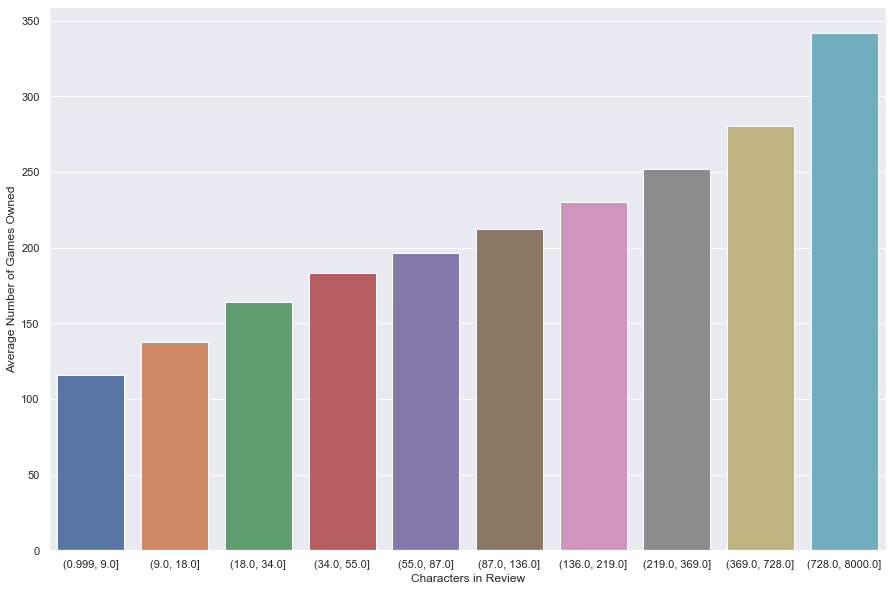

In [8]:
#Bar graphs using review character counts

#getting rid of large funny vote outliers 
df = df[df['votes_funny'] < 4294967292]

#cut into equal sized bins based on character lenght of review then get mean by grouping on bin
data = df.groupby(pd.qcut(df.review.map(lambda x: len(x)), q=10)).mean().reset_index()

#review lenght to number of games owned
sns.set(rc={'figure.figsize':(15,10)})
fig = sns.barplot(x='review', y='num_games_owned', data=data)
fig.set(xlabel='Characters in Review', ylabel="Average Number of Games Owned")

[Text(0.5, 0, 'Characters in Review'), Text(0, 0.5, 'Average Helpful Score')]

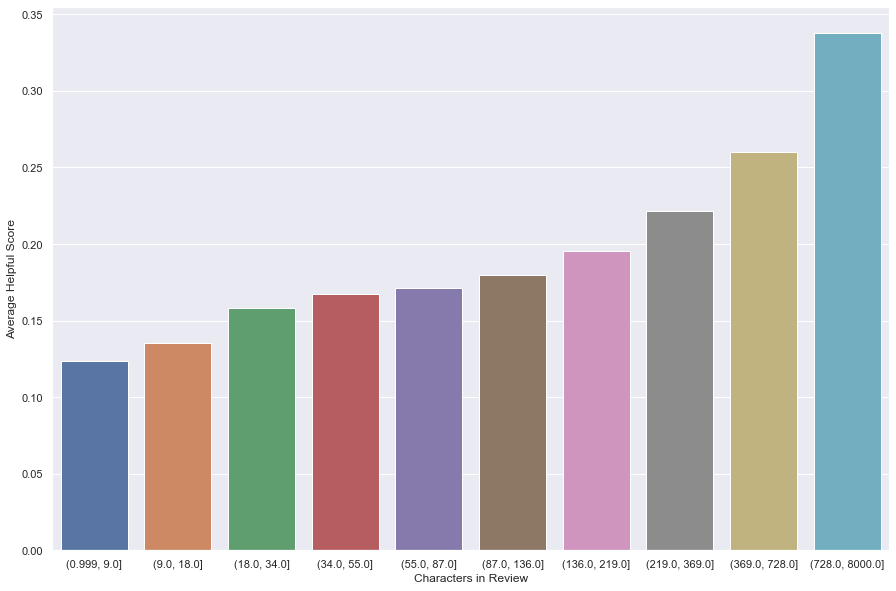

In [9]:
#review length to helpful score
sns.set(rc={'figure.figsize':(15,10)})
fig = sns.barplot(x='review', y='helpful_score', data=data)
fig.set(xlabel='Characters in Review', ylabel="Average Helpful Score")

[Text(0.5, 0, 'Characters in Review'), Text(0, 0.5, 'Average Funny Votes')]

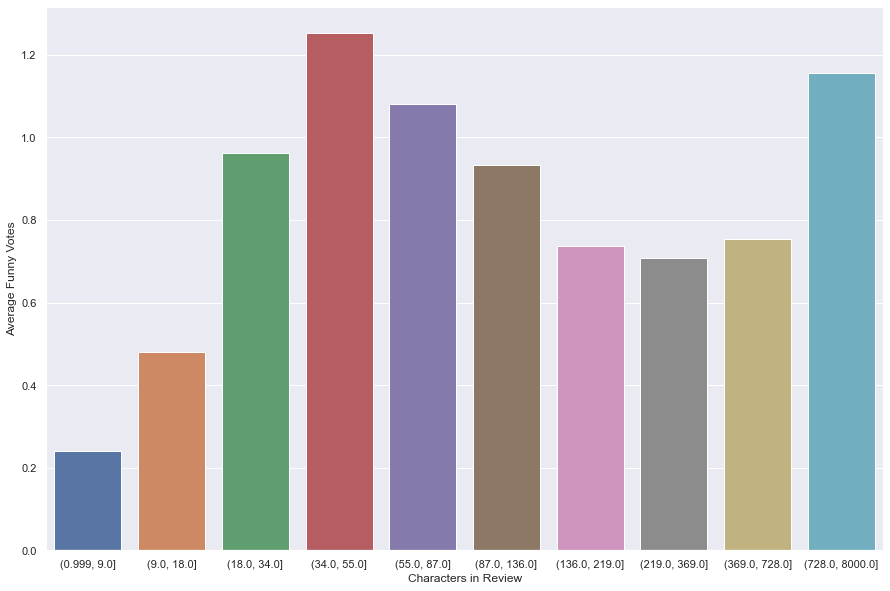

In [10]:
#review lengh to funny votes
sns.set(rc={'figure.figsize':(15,10)})
fig = sns.barplot(x='review', y='votes_funny', data=data)
fig.set(xlabel='Characters in Review', ylabel="Average Funny Votes")

(0.0, 50000.0)

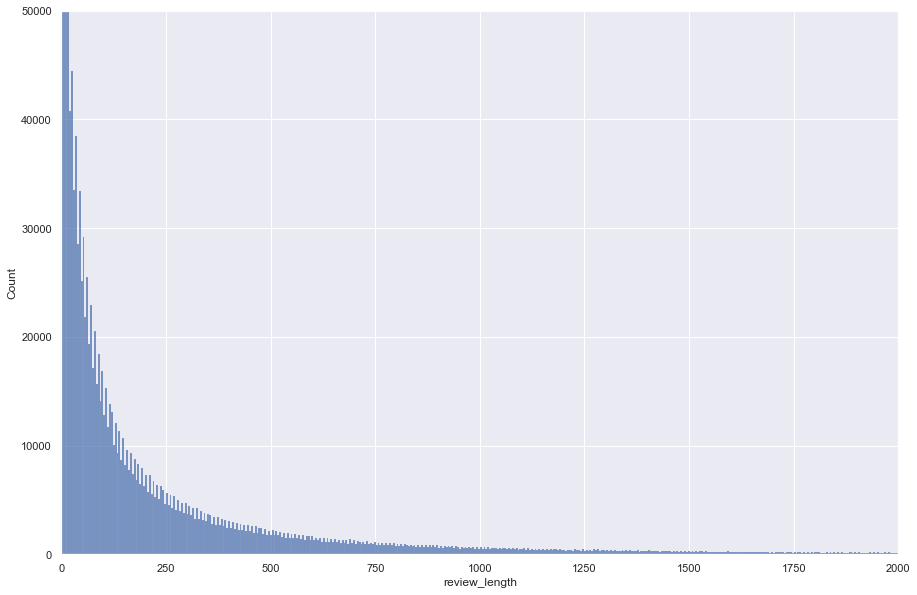

In [11]:
#histagram of review character lengths
df["review_length"] = df.review.map(lambda x: len(x))
sns.histplot(x='review_length', data=df)
plt.xlim(0,2000)
plt.ylim(0,50000)

In [12]:
#word count
import re

def get_counts(reviews):
    word_count = {}
    for review in reviews:
        words = review.split()
        for word in words:
            word = re.sub('[^a-zA-Z]+', '', word)
            word = word.lower()
            if word in word_count:
                word_count[word] = word_count[word] + 1
            else: 
                word_count[word] =  1
    word_count.pop('', None)
    return word_count
#this takes a while to run
word_count_all = get_counts(df['review']) #all reviews words count
word_count_r = get_counts( df[df['is_recommended'] == True]["review"]) #words for recommended
word_count_nr = get_counts(df[df['is_recommended'] == False]["review"]) #words for not recommended
print("done")

done


<BarContainer object of 20 artists>

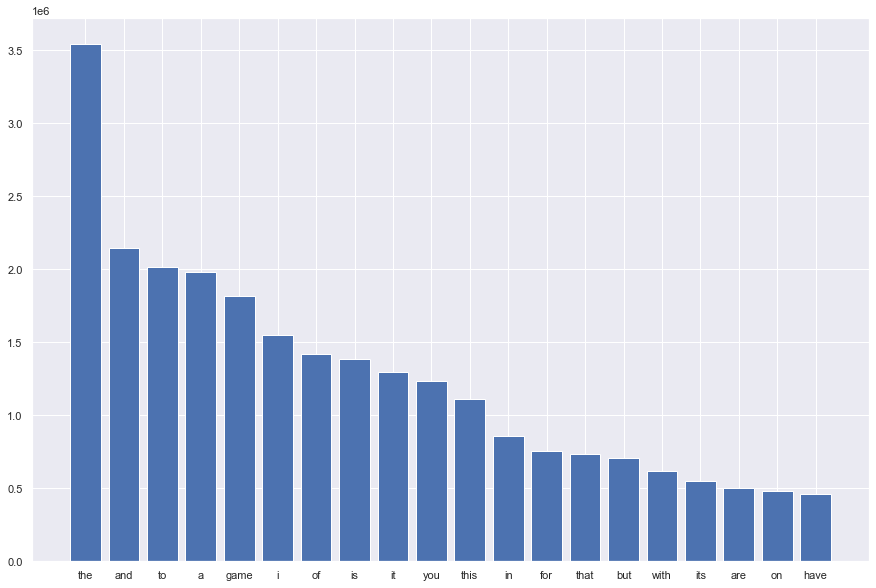

In [13]:
top_words = sorted(word_count_all.items(), key=lambda item: item[1], reverse=True)[:20]
word = list(zip(*top_words))[0]
count = list(zip(*top_words))[1]
plt.bar(word, count)


In [22]:
#compare words between occurance between recommended and not
print("bugs")
print(word_count_nr["bugs"]/sum(word_count_nr.values()))
print(word_count_r["bugs"]/sum(word_count_r.values()))

print("graphics")
print(word_count_nr["graphics"]/sum(word_count_nr.values()))
print(word_count_r["graphics"]/sum(word_count_r.values()))

print("fun")
print(word_count_nr["fun"]/sum(word_count_nr.values()))
print(word_count_r["fun"]/sum(word_count_r.values()))

bugs
0.0008208327760156188
0.0006496228700891271
graphics
0.0007479305989123018
0.0010397516149877203
fun
0.0020337308946932237
0.0055321693352119675


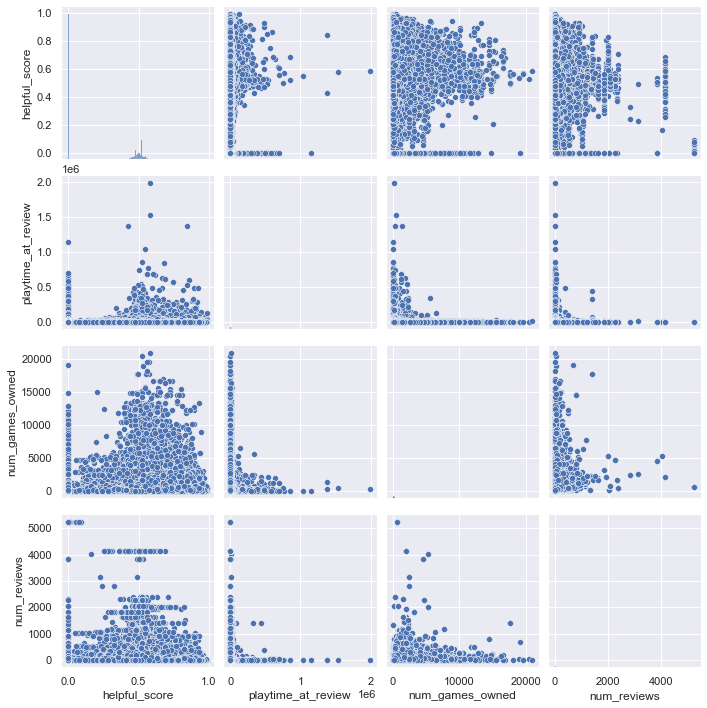

In [16]:
#pair plot
pair_data = df[['helpful_score', 'playtime_at_review', 'num_games_owned', 'num_reviews']]
sns.pairplot(pair_data)

([<matplotlib.patches.Wedge at 0x21c92bfe2e0>,
 [Text(0.9096977702782432, 0.6184253930352415, 'Risk of Rain 2'),
  Text(-0.06164532898915997, 1.0982713022809156, 'Bloons TD 6'),
  Text(-0.8164419333785281, 0.7371720080287445, 'Raft'),
  Text(-1.0966765662049018, 0.08544301690030463, 'Beat Saber'),
  Text(-0.9436505903041184, -0.5652641536650713, 'Slay the Spire'),
  Text(-0.4821228173828174, -0.9887151202236439, "Assassin's Creed Odyssey"),
  Text(0.08766346317628995, -1.0965013074428773, 'Stick Fight: The Game'),
  Text(0.6129662409121647, -0.9133851255095028, 'Sekiro™: Shadows Die Twice'),
  Text(0.9427124433192977, -0.566827353972054, 'Resident Evil 2'),
  Text(1.0832131996279448, -0.19143971414466274, 'Ravenfield')],
 [Text(0.4961987837881326, 0.3373229416555862, '19%'),
  Text(-0.03362472490317816, 0.5990570739714085, '14%'),
  Text(-0.4453319636610153, 0.4020938225611333, '11%'),
  Text(-0.5981872179299463, 0.046605281945620705, '10%'),
  Text(-0.5147185038022463, -0.308325901999

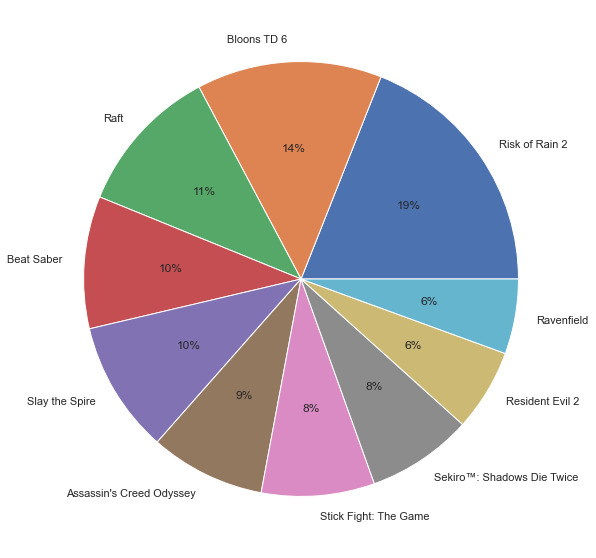

In [19]:
#Pie chart for share of top 10 most reviewed games
top_ten_games = df.groupby("appid").count().reset_index().sort_values(ascending=False, by='is_recommended')['appid'][:10].to_list()
top_ten_values = df.groupby("appid").count().reset_index().sort_values(ascending=False, by='is_recommended')['steamid'][:10].to_list()
labels = ['Risk of Rain 2', 'Bloons TD 6', 'Raft', 'Beat Saber', 'Slay the Spire', 'Assassin\'s Creed Odyssey', 'Stick Fight: The Game'
          , 'Sekiro™: Shadows Die Twice', 'Resident Evil 2', 'Ravenfield']
plt.pie(top_ten_values, labels = labels, autopct='%.0f%%')

C:\Users\Logan\anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


(0.0, 15000.0)

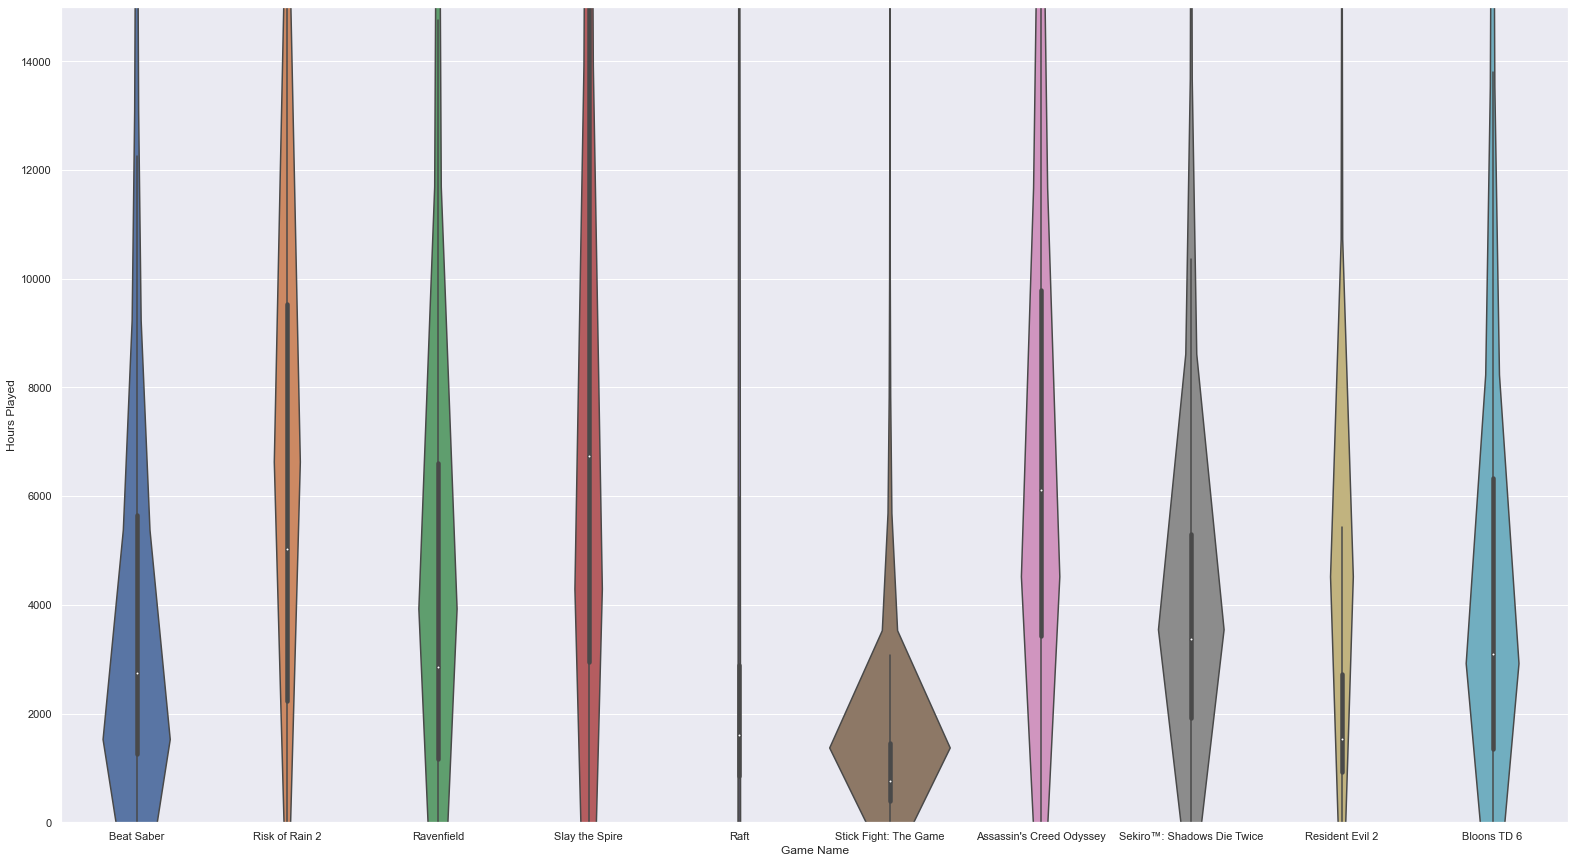

In [20]:
#Violin plot for hours played of 10 most popular games
data = df[df['appid'].isin(top_ten_games)]
games = {
    632360: "Risk of Rain 2", 
    960090: "Bloons TD 6", 
    648800: "Raft", 
    620980: "Beat Saber",
    646570: "Slay the Spire",
    812140: "Assassin's Creed Odyssey",
    674940: "Stick Fight: The Game",
    814380: "Sekiro™: Shadows Die Twice",
    883710: "Resident Evil 2",
    636480: "Ravenfield"
}
data.appid = data.appid.map(lambda x: games[x])
data
plt.figure(figsize=(27,15))
fig = sns.violinplot(x='appid', y='playtime_forever', data=data)
fig.set(xlabel='Game Name', ylabel='Hours Played')
plt.ylim(0,15000)
